In [1]:
# simplest generative adversarial network
# doesn't use a neural network, just a node with an adjustable parameter
# aim is to see the adversarial concept working

In [2]:
import random

import pandas

In [36]:
# function to generate true and false data

def generate_true():
    
    return random.uniform(0.9, 1.1)

In [57]:
# disciminitator node with adjustable parameter

class Discriminator:
    
    def __init__(self):
        self.parameter = 0.1
        
        # accumulator for progress
        self.progress = []
        pass
    
    def test(self, x):
        return x * self.parameter
    
    def train(self, x, target):
        output = self.test(x)
        error = target - output
        
        # use error to adjust parameter, learning rate is 0.05
        self.parameter += 0.05 * error * x
        
        #print("x = %.3f  o = %.3f  t = %.3f  e = %.3f  p = %.3f" % (x, output, target, error, self.parameter))
        # accumulate progress
        self.progress.append([error, self.parameter])        
        pass
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['error', 'parameter'])
        df.plot(figsize=(16,8))
        pass
    pass


In [58]:
# generator node with adjustable parameter

class Generator:
    
    def __init__(self):
        self.parameter = 0.1
        
        # accumulator for progress
        self.progress = []
        
        pass
    
    def generate(self):
        return self.parameter
    
    def train(self, x, target):
        output = self.generate()
        error = target - output
        
        # use error to adjust parameter, learning rate is 0.05
        self.parameter += 0.05 * error * x
        
        #print("x = %.3f  o = %.3f  t = %.3f  e = %.3f  p = %.3f" % (x, output, target, error, self.parameter))
        # accumulate progress
        self.progress.append([error, self.parameter])        
        pass
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['error', 'parameter'])
        df.plot(figsize=(16,8))
        pass
    pass

In [65]:
# create Discriminator and Generator

D = Discriminator()
G = Generator()


# train Discriminator and Generator

for i in range(300):
    
    # train discriminator on true
    D.train(generate_true(), 1.0)
    
    # train discriminator on false
    D.train(D.test(G.generate()), 0.0)
    
    # train generator
    G.train(D.test(G.generate()), 1.0)
    
    pass

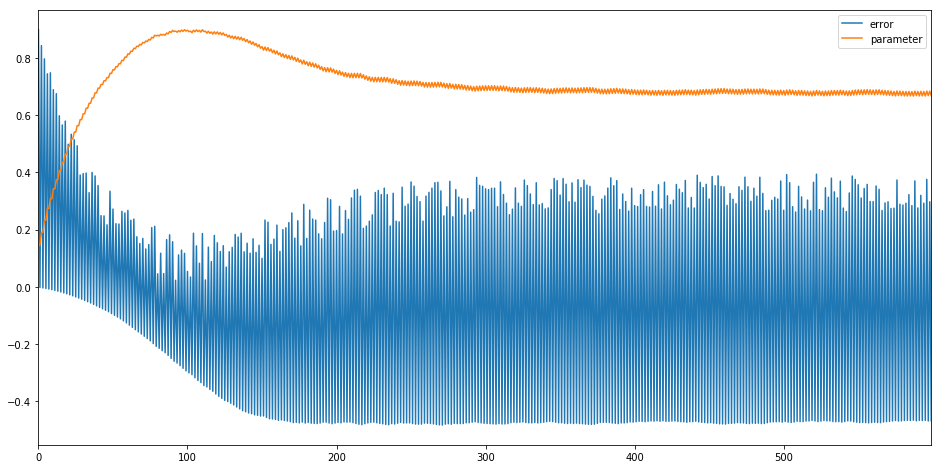

In [66]:
D.plot_progress()

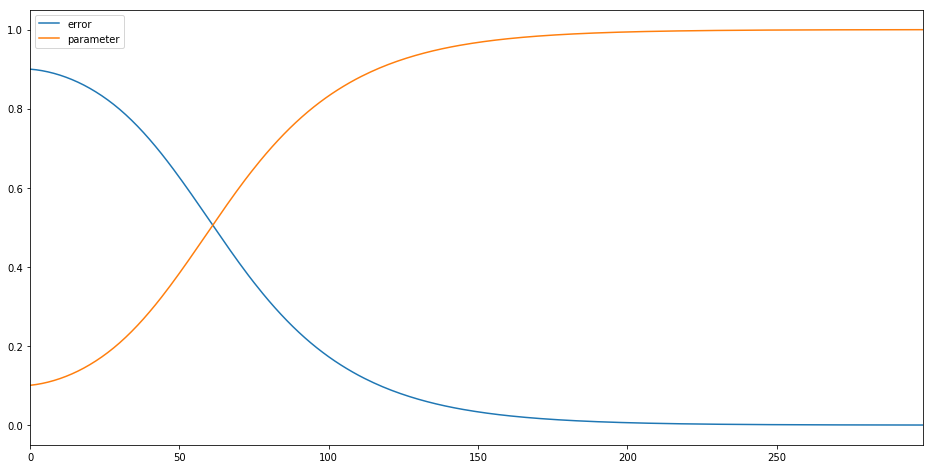

In [67]:
G.plot_progress()